In [1]:

from simulation import bootstrap_simulation, partial_state_update_blocks
import networkx as nx
import numpy as np
import pandas as pd
import datetime
from hatch import create_token_batches, TokenBatch, Commons
from convictionvoting import trigger_threshold
from policies import *
from network_utils import *
from IPython.core.debugger import set_trace
from entities import Participant, Proposal
from cadCAD.configuration import Configuration
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor

In [2]:
# For the Flask backend

# Commons/Augmented Bonding Curve parameters
hatchers = 60
proposals = 3
hatch_tribute = 0.2
vesting_80p_unlocked = 60
exit_tribute = 0.35
# kappa = 2, default option set in abcurve.py, there is no way to reach it from here for now

# Conviction Voting parameters
days_to_80p_of_max_voting_weight = 10  # used in ProposalFunding.su_calculate_gathered_conviction
max_proposal_request = 0.2  # will be passed to trigger_threshold()

In [3]:
initial_conditions, simulation_parameters = bootstrap_simulation(hatchers, proposals, hatch_tribute, vesting_80p_unlocked, exit_tribute, 2, days_to_80p_of_max_voting_weight, max_proposal_request)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# The configurations above are then packaged into a `Configuration` object
config = Configuration(initial_state=initial_conditions, #dict containing variable names and initial values
                       partial_state_update_blocks=partial_state_update_blocks, #dict containing state update functions
                       sim_config=simulation_parameters #dict containing simulation parameters
                      )

exec_mode = ExecutionMode()
exec_context = ExecutionContext(exec_mode.single_proc) # Do not use multi_proc, breaks ipdb.set_trace()
executor = Executor(exec_context, [config]) # Pass the configuration object inside an array
raw_result, tensor = executor.execute() # The `execute()` method returns a tuple; its first elements contains the raw results


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: single_proc: [<cadCAD.configuration.Configuration object at 0x7f99f85aabe0>]
Configurations: [<cadCAD.configuration.Configuration object at 0x7f99f85aabe0>]
ProposalFunding: Proposal 60 has 0.0 conviction, and needs 139778316.4804727 to pass
ProposalFunding: Proposal 61 has 0.0 conviction, and needs 145399776.08514884 to pass
ProposalFunding: Proposal 62 has 0.0 conviction, and needs 143842323.30473515 to pass
ParticipantVoting: Participant 1 was given Proposals with corresponding affinities {60: 0.1505248854660418, 61: 0.6346215019138466, 62: 0.00045014085481842603} and he decided to vote on {61: 0.6346215019138466}, distributing his tokens thusly {61: 4841704.597477809}
ParticipantVoting: Participant 2 w

ProposalFunding: Proposal 60 has 53667582.03297798 conviction, and needs 139777793.81064382 to pass
ProposalFunding: Proposal 61 has 58148871.25860414 conviction, and needs 145398463.1533047 to pass
ProposalFunding: Proposal 62 has 67828809.51010413 conviction, and needs 143841233.77926508 to pass
ParticipantVoting: Participant 1 was given Proposals with corresponding affinities {60: 0.1505248854660418, 61: 0.6346215019138466, 62: 0.00045014085481842603} and he decided to vote on {61: 0.6346215019138466}, distributing his tokens thusly {61: 4841704.597477809}
ParticipantVoting: Participant 2 was given Proposals with corresponding affinities {60: 0.0032706000548486935, 61: 0.6393407174076027, 62: 0.08450131042408915} and he decided to vote on {61: 0.6393407174076027}, distributing his tokens thusly {61: 3461133.0863737245}
ParticipantVoting: Participant 3 was given Proposals with corresponding affinities {60: 0.811281459959429, 61: 0.11336005003796967, 62: 0.6486442281126552} and he dec

GenerateNewProposal: Participant 43 created Proposal 63
ProposalFunding: Proposal 63 has 0.0 conviction, and needs 241182139.41874668 to pass
ParticipantVoting: Participant 2 was given Proposals with corresponding affinities {63: 0.6248143580104545} and he decided to vote on {63: 0.6248143580104545}, distributing his tokens thusly {63: 3461133.0863737245}
ParticipantVoting: Participant 6 was given Proposals with corresponding affinities {63: 0.6506547843140724} and he decided to vote on {63: 0.6506547843140724}, distributing his tokens thusly {63: 8446685.599867769}
ParticipantVoting: Participant 7 was given Proposals with corresponding affinities {63: 0.7707837363520071} and he decided to vote on {63: 0.7707837363520071}, distributing his tokens thusly {63: 4687799.765777785}
ParticipantVoting: Participant 8 was given Proposals with corresponding affinities {63: 0.7655465016938667} and he decided to vote on {63: 0.7655465016938667}, distributing his tokens thusly {63: 5117042.98227654

ProposalFunding: Proposal 64 has 583985124.8135213 conviction, and needs 239468372.24009293 to pass
ProposalFunding: Proposal 64 passed! deducting 251225.92428281886 from Commons funding pool
GenerateNewProposal: Participant 28 created Proposal 65
ProposalFunding: Proposal 65 has 0.0 conviction, and needs 173329532.04662722 to pass
ParticipantVoting: Participant 1 was given Proposals with corresponding affinities {65: 0.6654792716671745} and he decided to vote on {65: 0.6654792716671745}, distributing his tokens thusly {65: 4841704.597477809}
ParticipantVoting: Participant 5 was given Proposals with corresponding affinities {65: 0.5121818996786089} and he decided to vote on {65: 0.5121818996786089}, distributing his tokens thusly {65: 162259.82313323396}
ParticipantVoting: Participant 6 was given Proposals with corresponding affinities {65: 0.5971658683296148} and he decided to vote on {65: 0.5971658683296148}, distributing his tokens thusly {65: 8446685.599867769}
ParticipantVoting: P

ProposalFunding: Proposal 67 has 65247103.899877444 conviction, and needs 177292111.2193645 to pass
ParticipantVoting: Participant 0 was given Proposals with corresponding affinities {67: 0.9230290228119518} and he decided to vote on {67: 0.9230290228119518}, distributing his tokens thusly {67: 438263.5257107337}
ParticipantVoting: Participant 1 was given Proposals with corresponding affinities {67: 0.6430062389086164} and he decided to vote on {67: 0.6430062389086164}, distributing his tokens thusly {67: 4841704.597477809}
ParticipantVoting: Participant 3 was given Proposals with corresponding affinities {67: 0.5552301853079116} and he decided to vote on {67: 0.5552301853079116}, distributing his tokens thusly {67: 814900.7118663776}
ParticipantVoting: Participant 4 was given Proposals with corresponding affinities {67: 0.5300146247732453} and he decided to vote on {67: 0.5300146247732453}, distributing his tokens thusly {67: 3598189.523435409}
ParticipantVoting: Participant 9 was giv

GenerateNewProposal: Participant 8 created Proposal 71
ProposalFunding: Proposal 70 has 440148155.4089696 conviction, and needs 167937976.58305335 to pass
ProposalFunding: Proposal 71 has 0.0 conviction, and needs 156436806.48426092 to pass
ProposalFunding: Proposal 70 passed! deducting 92987.63764592951 from Commons funding pool
ParticipantVoting: Participant 8 was given Proposals with corresponding affinities {71: 1} and he decided to vote on {71: 1}, distributing his tokens thusly {71: 5117042.982276545}
ParticipantVoting: Participant 13 was given Proposals with corresponding affinities {71: 0.7551185414450889} and he decided to vote on {71: 0.7551185414450889}, distributing his tokens thusly {71: 8415796.898571704}
ParticipantVoting: Participant 21 was given Proposals with corresponding affinities {71: 0.7376275465645905} and he decided to vote on {71: 0.7376275465645905}, distributing his tokens thusly {71: 8940538.15388506}
ParticipantVoting: Participant 22 was given Proposals wi

In [4]:
df = pd.DataFrame(raw_result)
df_final = df[df.substep.eq(2)]


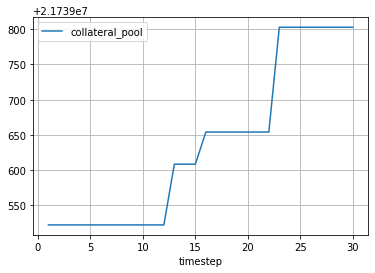

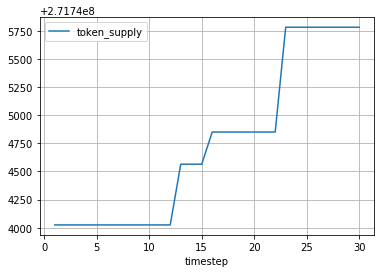

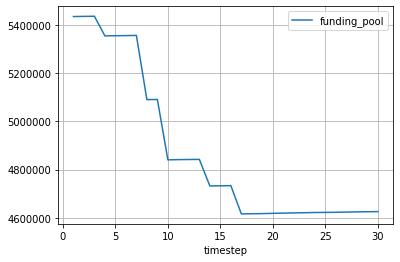

In [5]:
df_final.plot("timestep", "collateral_pool", grid=True)
df_final.plot("timestep", "token_supply", grid=True)
df_final.plot("timestep", "funding_pool", grid=True)

In [6]:
# import matplotlib.pyplot as plt
# supporters = get_edges_by_type(network, 'support')
# influencers = get_edges_by_type(network, 'influence')
# competitors = get_edges_by_type(network, 'conflict')

# nx.draw_kamada_kawai(network, nodelist = get_participants(network), edgelist=influencers)
# plt.title('Participants Social Network')

In [7]:
# For the Flask backend
result = {
    "timestep": list(df_final["timestep"]),
    "funding_pool": list(df_final["funding_pool"]),
    "token_supply": list(df_final["token_supply"]),
    "collateral": list(df_final["collateral_pool"])
}